# Neural networks from scratch

## Libraries and dataset

In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
from sklearn.datasets import make_moons
X, y_ = make_moons(1000, noise=.2)
y = y_[:, np.newaxis]           # Make it a one-column matrix

Visualize the dataset

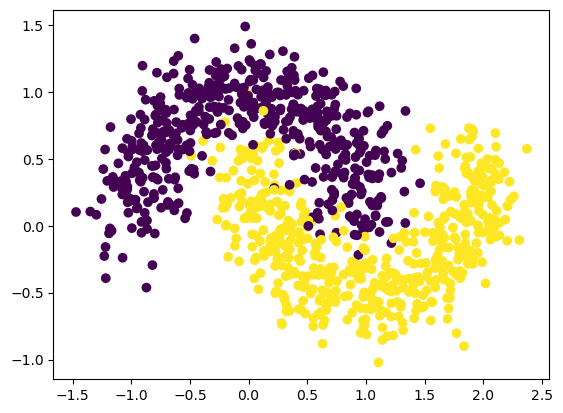

In [2]:
# <answer>
plt.scatter(*X.T, c=y_)
plt.show()
# </answer>

## Activation functions

ReLU and sigmoid function and their derivative (should work for numpy
array of any dimension (1D, 2D,...))

In [6]:
def relu(v):
    # <answer>
    vv = np.copy(v)
    vv[vv < 0] = 0
    return vv
    # </answer>


def drelu(v):
    # <answer>
    vv = np.copy(v)
    vv[vv <= 0] = 0
    vv[vv > 0] = 1
    return vv
    # </answer>


def sigmoid(v):
    # <answer>
    return 1 / (1 + np.exp(-v))
    # </answer>


def dsigmoid(v):
    # <answer>
    return sigmoid(v) * (1 - sigmoid(v))
    # </answer>

## Defining the neural network

First define the shape of the neural network:

- `n0`: size of input,
- `n1`: size of hidden layer,
- `n2`: size of output.

In [7]:
# <answer>
n0 = 2 #每一个输入的维度
n1 = 50 #隐藏层神经元个数
n2 = 1  #
# </answer>

Variables for weights, biases of each layers and intermediate
variables to compute the gradient.

In [9]:
# Weights
W1 = np.random.randn(n0, n1)
W2 = np.random.randn(n1, n2)

# Biases
b1 = np.random.randn(n1)
b2 = np.random.randn(n2)

# Partial derivatives of output w.r.t. activations, see slide
# "Backpropagation equations"
Xx_1 = np.zeros((n2, n1))
Xx_2 = np.zeros((n2, n2))

# Partial derivatives of output w.r.t. biases, see slide
# "Backpropagation equations"
Xb_1 = np.zeros((n2, n1))
Xb_2 = np.zeros((n2, n2))

# Partial derivatives of output w.r.t. weigths, see slide
# "Backpropagation equations"
Xw_1 = np.zeros((n2, n1, n0))
Xw_2 = np.zeros((n2, n2, n1))

# Partial derivatives of loss w.r.t. weigths and biases, see slide
# "Cross entropy loss"
Lw_1 = np.zeros((n1, n0))
Lw_2 = np.zeros((n2, n1))
Lb_1 = np.zeros(n1)
Lb_2 = np.zeros(n2)

Define the learning rate and the activation functions along their
derivatives at each layer:

- `eta`: learning rate
- `af1`, `daf1`: activation function and its derivative for hidden layer
- `af2`, `daf2`: activation function and its derivative for output layer

In [10]:
# Define eta, af1, daf1, af2, daf2
# <answer>
eta = 0.01
af1 = relu
daf1 = drelu
af2 = sigmoid
daf2 = dsigmoid
# </answer>

## The learning loop

In [11]:
nepochs = 15
for epoch in range(nepochs + 1):
    #enumerate会给出索引和元素，zip组合两个
    #idx位置，x0当前元素
    for idx, (x0, y2) in enumerate(zip(X, y)):
        # Implement the forward pass: use `W1`, `x0`, `b1`, `af1`, `W2`,
        # `x1`, `b2`, `af2` to define `z1`, `x1`, `z2`, `x2`.
        # <answer>
        z1 = W1.T @ x0 + b1
        x1 = af1(z1)
        z2 = W2.T @ x1 + b2
        x2 = af2(z2)
        # </answer>

        if idx % 100 == 0:
            print(f"Epoch: {epoch}, sample: {idx}, class: {y2}, prob: {x2}")

        # To initialize the recurrent relation (3), see slide
        # "Backpropagation equations"
        # <answer>
        Xx_2 = np.eye(n2)
        # </answer>

        # Update partial derivatives of output w.r.t. weights and
        # biases on second layer
        for i in range(n2):
            for p in range(n2):
                # See equation (2) in slide "Backpropagation equations"
                # <answer>
                Xb_2[i, p] = Xx_2[i, p] * daf2(z2[p])
                # </answer>
                for q in range(n1):
                    # See equation (1) in slide "Backpropagation equations"
                    # <answer>
                    Xw_2[i, p, q] = Xx_2[i, p] * x1[q] * daf2(z2[p])
                    # </answer>

        # Update partial derivatives of output w.r.t. activations
        for i in range(n2):
            for p in range(n1):
                Xx_1[i, p] = 0
                for j in range(n2):
                    # See equation (3) in slide "Backpropagation equations"
                    # <answer>
                    Xx_1[i, p] += Xx_2[i, j] * W2[p, j] * daf2(z2[j])
                    # </answer>

        # Update partial derivatives of output w.r.t. weights and
        # biases on first layer
        for i in range(n2):
            for p in range(n1):
                # See equation (2) in slide "Backpropagation equations"
                # <answer>
                Xb_1[i, p] = Xx_1[i, p] * daf1(z1[p])
                # </answer>
                for q in range(n0):
                    # See equation (1) in slide "Backpropagation equations"
                    # <answer>
                    Xw_1[i, p, q] = Xx_1[i, p] * daf1(z1[p]) * x0[q]
                    # </answer>

        # Compute partial derivatives of the loss w.r.t weights and
        # biases. For simplicity, we will use the MSE loss instead of
        # the cross-entropy loss because it does not require an
        # additional softmax step.
        for p in range(n1):
            for q in range(n0):
                Lw_1[p, q] = 0
                for i in range(n2):
                    # Partial derivatives of loss w.r.t. weigths, see
                    # slide "MSE loss"
                    # <answer>
                    Lw_1[p, q] += 2 * (x2[i] - y2[i]) * Xw_1[i, p, q]
                    # Lw_1[p, q] += (x2[i] - y2[i]) / (x2[i] * (1 - x2[i])) * Xw_1[i, p, q]
                    # </answer>

        for p in range(n2):
            for q in range(n1):
                Lw_2[p, q] = 0
                for i in range(n2):
                    # Partial derivatives of loss w.r.t. weigths, see
                    # slide "MSE loss"
                    # <answer>
                    Lw_2[p, q] += 2 * (x2[i] - y2[i]) * Xw_2[i, p, q]
                    # Lw_2[p, q] += (x2[i] - y2[i]) / (x2[i] * (1 - x2[i])) * Xw_2[i, p, q]
                    # </answer>

        for p in range(n2):
            Lb_2[p] = 0
            for i in range(n2):
                # Partial derivatives of loss w.r.t. biases, see slide
                # "MSE loss"
                # <answer>
                Lb_2[p] += 2 * (x2[i] - y2[i]) * Xb_2[i, p]
                # Lb_2[p] += (x2[i] - y2[i]) / (x2[i] * (1 - x2[i])) * Xb_2[i, p]
                # </answer>

        for p in range(n1):
            Lb_1[p] = 0
            for i in range(n2):
                # Partial derivatives of loss w.r.t. biases, see slide
                # "MSE loss"
                # <answer>
                Lb_1[p] += 2 * (x2[i] - y2[i]) * Xb_1[i, p]
                # Lb_1[p] += (x2[i] - y2[i]) / (x2[i] * (1 - x2[i])) * Xb_1[i, p]
                # </answer>

        # Gradient descent step: use `eta`, `Lw_1` `Lw_2` `Lb_1` `Lb_2` to
        # update `W1`, `W2`, `b1`, `b2`.
        # <answer>
        W1 -= eta * Lw_1.T
        W2 -= eta * Lw_2.T
        b1 -= eta * Lb_1
        b2 -= eta * Lb_2
        # </answer>

Epoch: 0, sample: 0, class: [0], prob: [0.89970034]
Epoch: 0, sample: 100, class: [0], prob: [0.99957373]
Epoch: 0, sample: 200, class: [0], prob: [0.21586474]
Epoch: 0, sample: 300, class: [1], prob: [0.32772378]
Epoch: 0, sample: 400, class: [1], prob: [0.75456901]
Epoch: 0, sample: 500, class: [0], prob: [0.00279879]
Epoch: 0, sample: 600, class: [1], prob: [0.96391028]
Epoch: 0, sample: 700, class: [1], prob: [0.97019478]
Epoch: 0, sample: 800, class: [1], prob: [0.49982221]
Epoch: 0, sample: 900, class: [0], prob: [0.00071376]
Epoch: 1, sample: 0, class: [0], prob: [0.00124672]
Epoch: 1, sample: 100, class: [0], prob: [0.08086889]
Epoch: 1, sample: 200, class: [0], prob: [0.00068439]
Epoch: 1, sample: 300, class: [1], prob: [0.78209293]
Epoch: 1, sample: 400, class: [1], prob: [0.89064899]
Epoch: 1, sample: 500, class: [0], prob: [0.01036061]
Epoch: 1, sample: 600, class: [1], prob: [0.98657386]
Epoch: 1, sample: 700, class: [1], prob: [0.98774078]
Epoch: 1, sample: 800, class: [1

## Vizualization

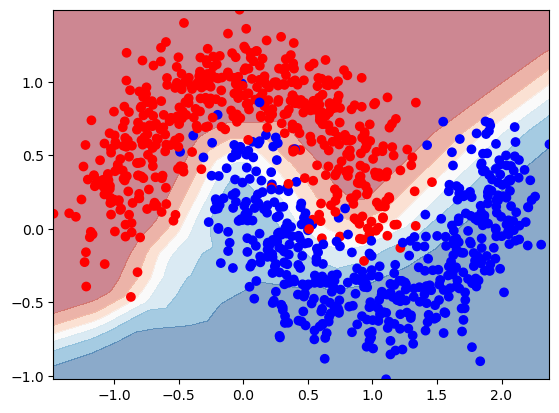

In [12]:
num = 250
x = np.linspace(X[:, 0].min(), X[:, 0].max(), num)
y = np.linspace(X[:, 1].min(), X[:, 1].max(), num)
XX, YY = np.meshgrid(x, y)
points = np.c_[XX.ravel(), YY.ravel()]

z1 = W1.T @ points.T + b1[:, np.newaxis]
x1 = af1(z1)
z2 = W2.T @ x1 + b2[:, np.newaxis]
x2 = af2(z2)

C = x2.reshape(num, num)

plt.contourf(XX, YY, C, cmap=plt.cm.RdBu, alpha=.5)
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.scatter(*X.T, c=y_, cmap=cm_bright)

plt.show()